In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv('./SOCR-HeightWeight.csv')
df.drop(columns=['Index'],inplace=True)


In [4]:
df.describe()
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
print(df.size)
df.shape

50000


(25000, 2)

In [6]:
df.isnull().sum()


Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [8]:
df[['Height(Inches)','Weight(Pounds)']].head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


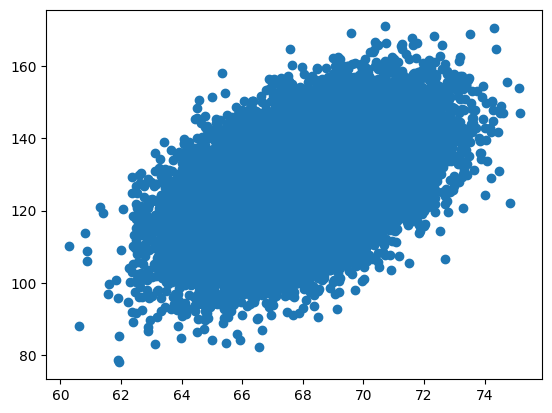

In [13]:
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])


In [14]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


<Axes: >

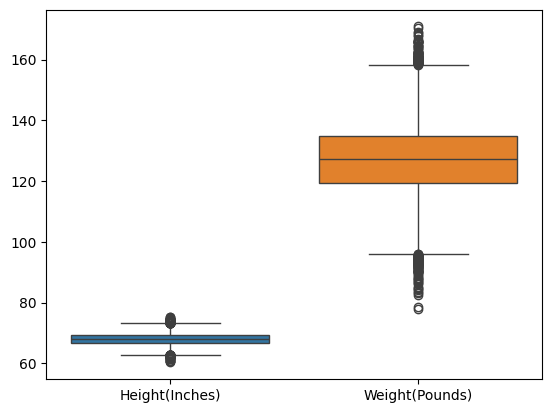

In [21]:
sns.boxplot(df)

In [22]:
Q1 = df['Weight(Pounds)'].quantile(0.25)
Q3 = df['Weight(Pounds)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
df_no_outliers = df[(df['Weight(Pounds)'] >= lower_bound) & (df['Weight(Pounds)'] <= upper_bound)]

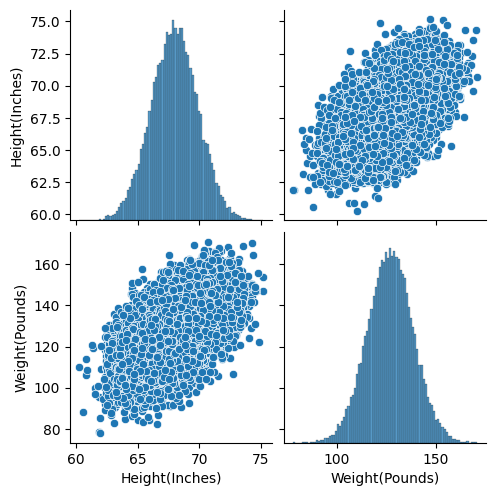

In [23]:
sns.pairplot(df)

In [ ]:
X=df[['Weight(Pounds)']]
Y=df[['Height(Inches)']]

(25000,)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


In [36]:
X_train_Scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_Scaled=scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LinearRegression


In [40]:
lr=LinearRegression()
lr.fit(X_train_Scaled,Y_train)

y_pred=lr.predict(X_test_Scaled)

/Users/abhiram/Documents/DS_Git/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Best fit line')

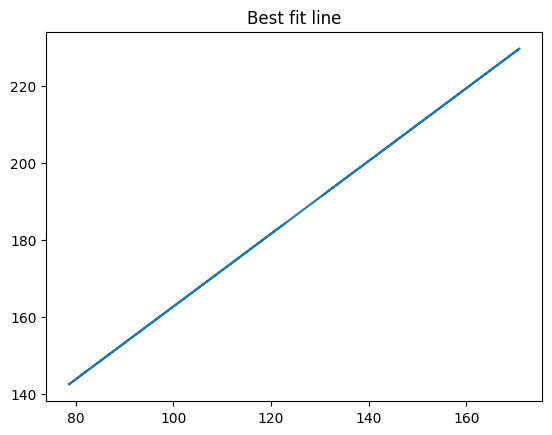

In [43]:
plt.plot(X_train,lr.predict(X_train))
plt.title("Best fit line")

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(f"Coefficient: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

print(f"MSE: {mean_squared_error(Y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(Y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test,y_pred))}")
print(f"R2: {r2_score(Y_test,y_pred)}")

Coefficient: [0.94694738]
Intercept: 67.99666177257143
MSE: 2.7260408608752855
